In [7]:
import json
import cv2
import hub
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle

In [38]:
from tqdm import tqdm

In [40]:
#!activeloop login

In [46]:
ds=hub.empty('hub://aismail2/pepper_keypoints',overwrite=True)

Your Hub dataset has been successfully created!
The dataset is private so make sure you are logged in!
This dataset can be visualized at https://app.activeloop.ai/aismail2/pepper_keypoints.


In [52]:
keypoints=["Head","Tail"]
connections=[[1,2]]

In [53]:
pkl="/home/asad/projs/veg_phenotyping/pepper/detection-correction/point_annotation.pkl"
key_file = open(pkl, "rb")
points = pickle.load(key_file)
files=list(points.keys())
img_dir="/home/asad/projs/veg_phenotyping/pepper/detection-correction/patches_data"

In [54]:
with ds:
    ds.create_tensor('images', htype='image', sample_compression = 'jpeg')
    ds.create_tensor('keypoints', htype = 'keypoints_coco', dtype = 'int32')
    ds.keypoints.info.update(keypoints = keypoints, connections = connections)
    for file in tqdm(files):
        img_path=os.path.join(img_dir,file)
        if points[file][0] is None:
            points[file][0]=(-1,-1)
        if points[file][1] is None:
            points[file][1]=(-1,-1)    
        ann_kp=[points[file][0][0],points[file][0][1],2,points[file][1][0],points[file][1][1],2]
        keypoints_kp = np.zeros((6,1))   
        keypoints_kp[:,0] = np.array(ann_kp)
        ds.images.append(hub.read(img_path))
        ds.keypoints.append(keypoints_kp.astype('int32'))

TensorAlreadyExistsError: Tensor 'images' already exists. If applicable, you can use the `overwrite=True` parameter!

In [ ]:
ds.keypoints.info

In [51]:
def vis_annotation(ind=200):
    img = ds.images[ind].numpy()
    h,w,_ = img.shape
    keypoints = ds.keypoints[ind].numpy()
    head=(keypoints[0],keypoints[1])
    tail=(keypoints[3],keypoints[4])
    img = cv2.circle(img, head, 10, (0,244,120), -1)
    img = cv2.circle(img, tail, 10, (0,120,170), -1)
    #cv2.putText(img, ds.labels.info.class_names[ds.labels[ind].numpy()[b]],(x1,y1),font,fontScale,color,width)
    #img[np.where(mask==True)] = np.array([0,120,120])
    return img

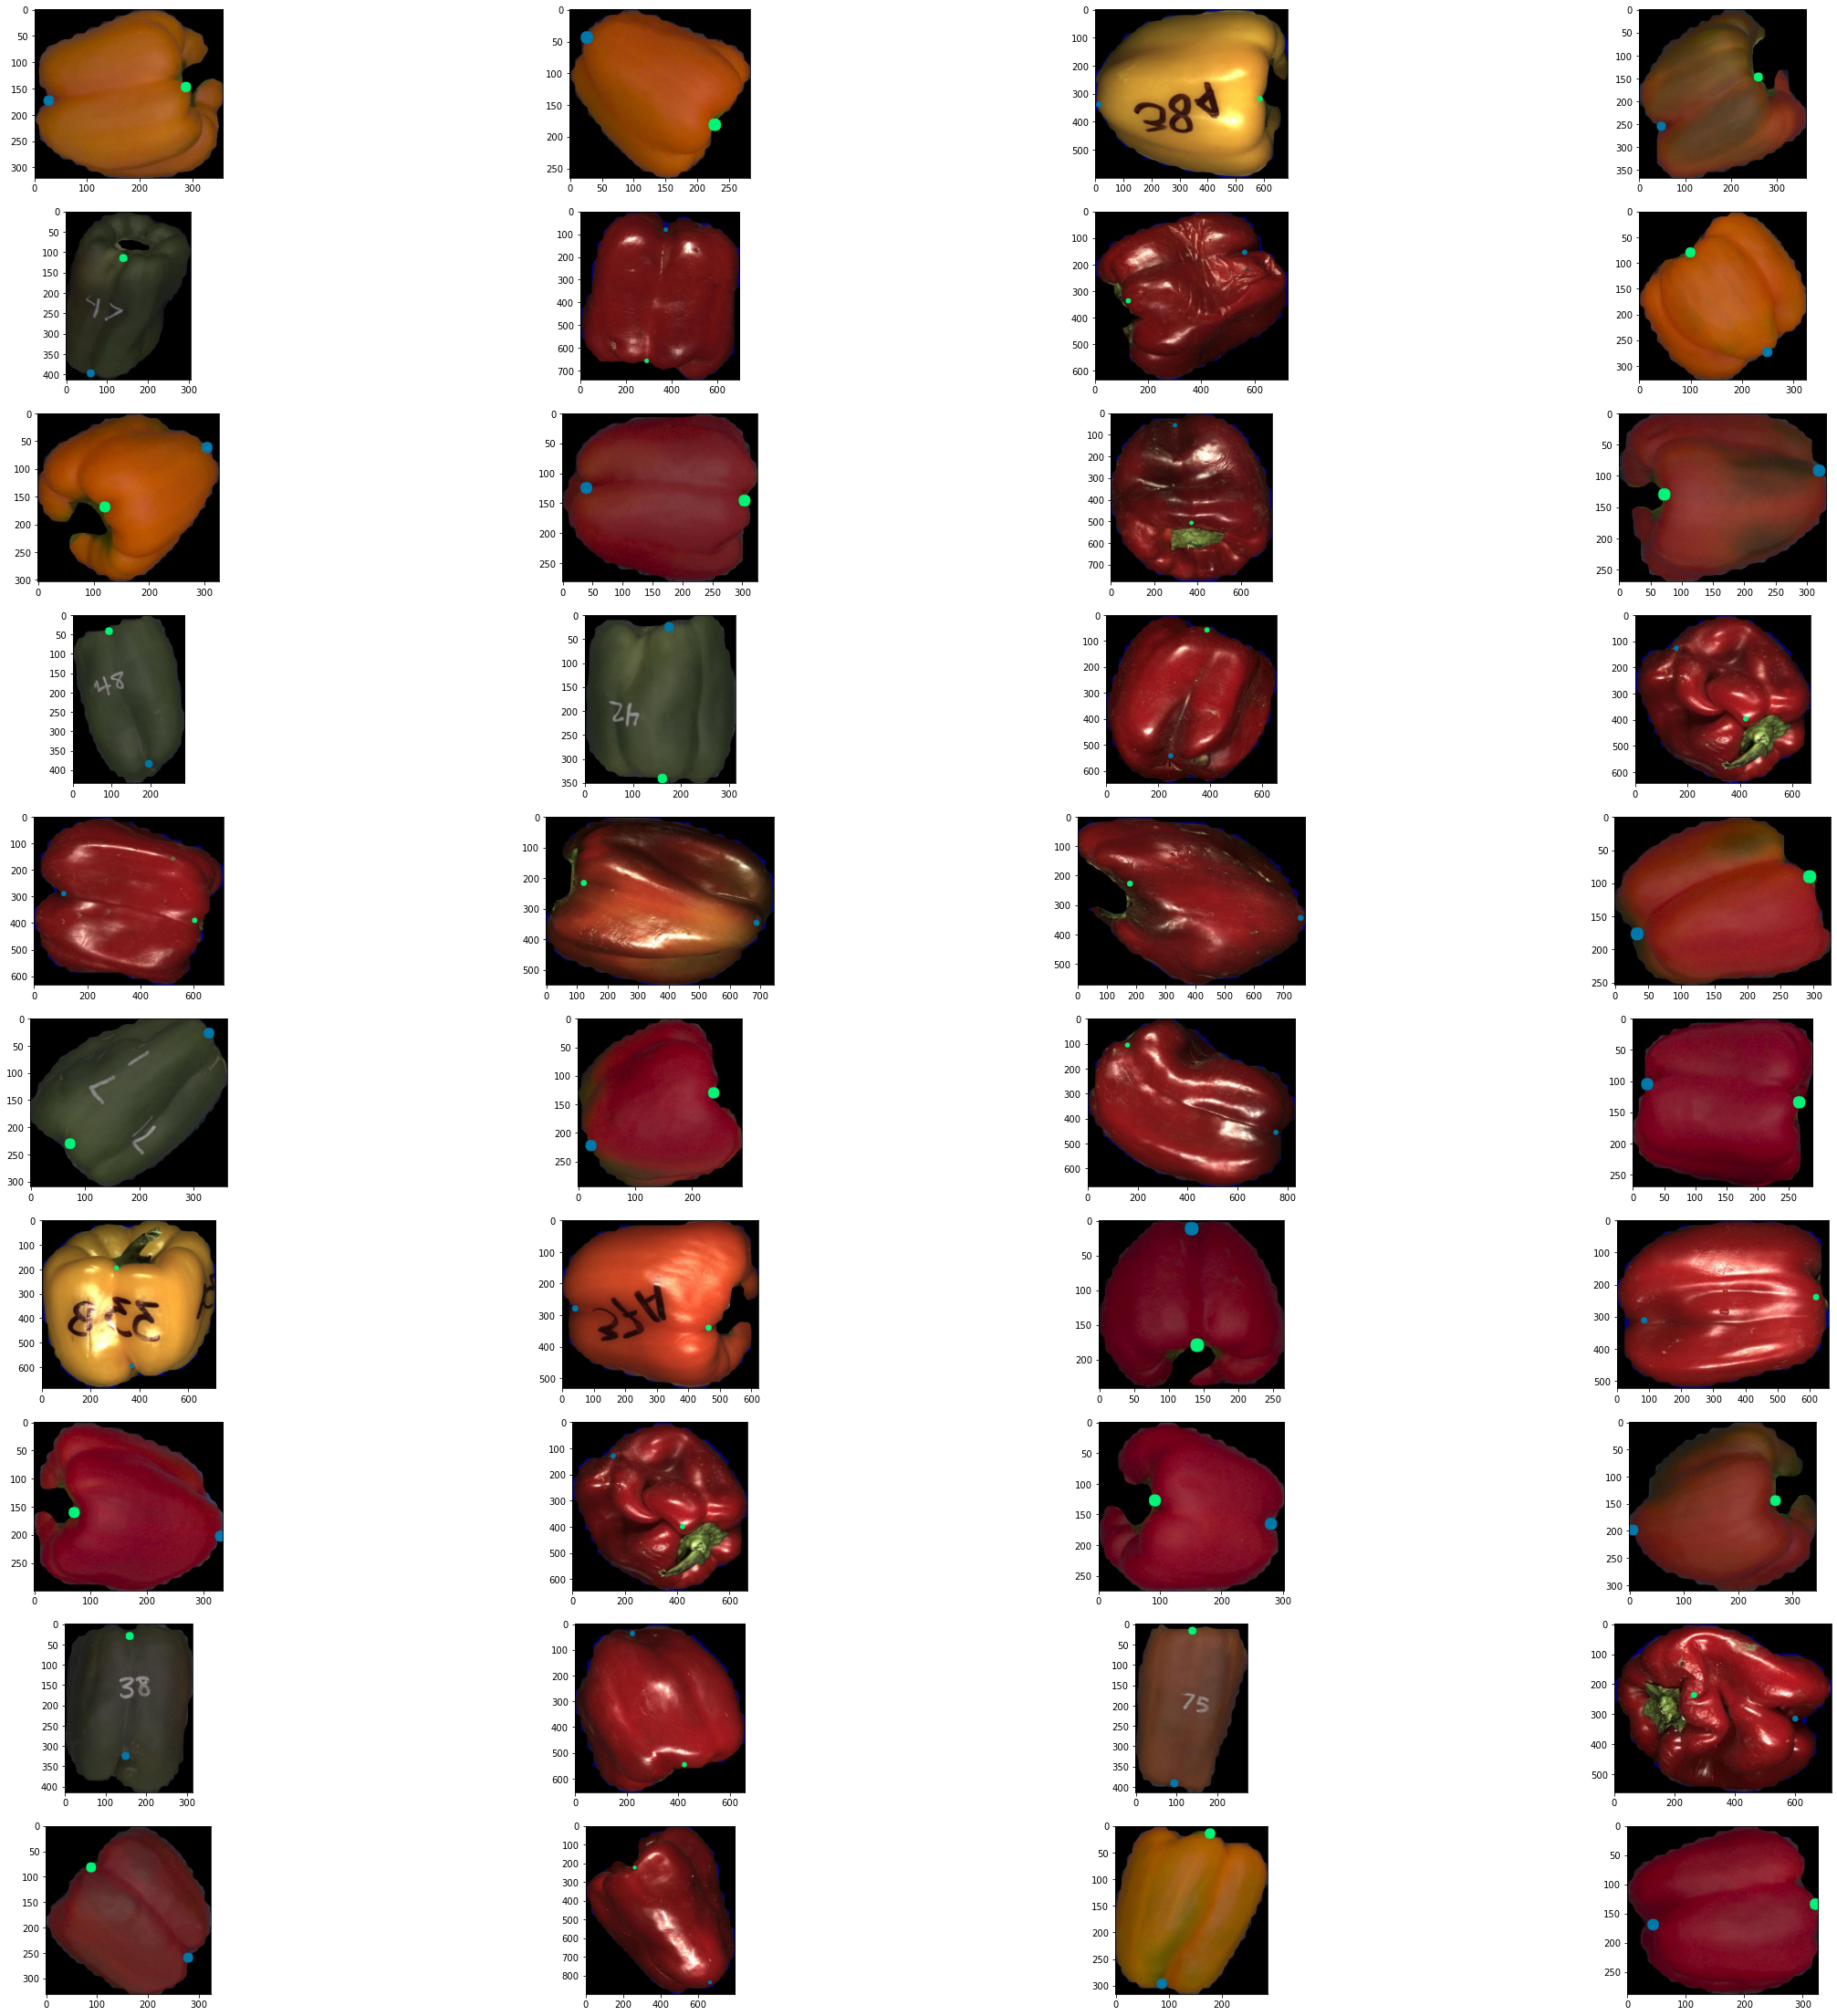

In [36]:
fig=plt.figure(figsize=(40,40))
n=40
for i in range(n):
    # Debug, plot figure
    ind=int(np.random.choice(range(0,len(ds))))
    img=vis_annotation(ind)
    fig.add_subplot(n//4, 4, i + 1)
    plt.imshow(img)
plt.show(block=True)